# Importing important libraries

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Preprocessing

In [0]:
data = pd.read_excel('ML_project_final.xlsx')
data.tail()

,Company_id,Company_Status,Age_of_company_in_years,Internet_activity_Score,Focus_function,Total_investors,Employee_Count,Has_the_team_size_grown,Last_Funding_Amount,Continent_of_company,Number_of_Investors_in_Seed,Number_of_Investors_in_Angel_andor_VC,Number_of_Cofounders,Number_of_advisors,Team_size_Senior_leadership,Team_size_all_employees,Presenceofatopangelorventurefundinpreviousroundofinvestment,Numberofofrepeatinvestors,NumberofSalesSupportmaterialL,Workedintopcompanies,AveragesizeofcompaniesworkedforinthepastL,Havebeenpartofstartupsinthepast,Havebeenpartofsuccessfulstartupsinthepast,WasheorshepartnerinBig5consulting,Consultingexperience,Productorservicecompany,Cateringtoproductserviceacrossverticals,Focusonprivateorpublicdata,Focusonconsumerdata,Focusonstructuredorunstructureddata,Subscriptionbasedbusiness,Cloudorplatformbasedseriveproduct,Localorglobalplayer,LinearorNonlinearbusinessmodel,Capitalintensivebusiness,NumberofofPartnersofcompanyL,Crowdsourcingbasedbusiness,Crowdfundingbasedbusiness,MachineLearningbasedbusiness,PredictiveAnalyticsbusiness,...,HighesteducationL,Yearsofeducation,Relevanceofeducationtoventure,Relevanceofexperiencetoventure,DegreefromaTier1orTier2university,Renownedinprofessionalcircle,ExperienceinsellingandbuildingproductsL,ExperienceinFortune100organizations,ExperienceinFortune500organizations,ExperienceinFortune1000organizations,TopmanagementsimilarityL,NumberofRecognitionsforFoundersandCofounders,NumberofResearchpublicationsL,Skillsscore,TeamCompositionscoreL,DificultyofObtainingWorkforceL,PricingStrategy,Hyperlocalisation,Timetomarketserviceorproduct,Longtermrelationshipwithotherfounders,Proprietaryorpatentpositioncompetitiveposition,Barriersofentryforthecompetitors,Companyawards,Controversialhistoryoffounderorcofounder,Legalriskandintellectualproperty,googlepagerankofcompanywebsite,Technicalproficienciestoanalyseandinterpretunstructureddata,Solutionsoffered,Investedthroughglobalincubationcompetitions,Industrytrendininvesting,DisruptivenessoftechnologyL,NumberofDirectcompetitors,Employeesperyearofcompanyexistence,LastroundoffundingreceivedinmilionUSD,Survivalthroughrecessionbasedonexistenceofthecompanythroughreces,Timeto1stinvestmentinmonths,Avgtimetoinvestmentaverageacrossallroundsmeasuredfrompreviousinv,Gartnerhypecyclestage,Timetomaturityoftechnologyinyears,Renownscore
467,468,0,3.000000,-5.000000,3,1.960045,-20.691802,0,6.585624e+05,1,0.000000,0.000000,0,0,1,1.198368,0,0.000000,1,0,1,1,1,0,0,1,1,0,0,3,0,2,1,2,0,0.165073,0,0,0,0,...,1,19.993955,1,1,0,461.795809,2,0,0,0,0,45.941573,0,19.688125,1,1,0,0,1,0,0,1,0,0,0,4.686764e+06,0,1,0,3,2,2.810880,4.382598,0.336817,2,3.534170,6.194215,5,2,1.986091
468,469,0,4.850063,6.993298,1,3.558150,-4.412020,0,2.129869e+06,1,0.000000,4.000000,0,0,1,20.340732,0,0.000000,1,0,1,1,1,0,0,2,0,0,0,3,0,2,2,1,1,0.111711,0,0,0,0,...,1,20.657823,1,1,0,444.171451,2,0,0,0,0,53.091021,0,17.910411,1,1,0,0,1,0,0,1,0,0,0,4.064527e+06,0,1,0,3,2,1.437588,2.810184,1.548642,2,11.186490,9.366353,5,2,0.000000
469,470,0,4.000000,0.000000,1,3.185666,0.000000,0,1.882888e+06,1,1.636609,0.431258,2,0,1,33.139739,0,0.334441,1,0,1,1,1,0,0,2,0,3,0,3,1,1,2,2,0,0.094998,0,0,1,1,...,1,19.697473,1,1,0,452.001491,2,0,0,0,0,63.872531,0,21.483696,1,1,0,0,1,0,0,1,0,0,0,3.958436e+06,0,1,0,3,2,2.368289,8.401463,1.767919,2,8.041912,8.831707,5,2,3.018497
470,471,0,5.000000,0.000000,5,3.027159,-7.925634,0,1.000000e+05,1,1.682614,0.346231,3,2,1,-55.166615,0,0.885422,1,0,1,1,1,0,0,2,1,3,0,3,1,1,2,1,0,0.050810,0,0,1,1,...,1,19.582242,1,1,0,450.810267,2,0,0,0,0,77.290067,0,22.016017,1,1,0,0,1,0,0,1,0,0,0,4.154496e+06,0,1,0,3,2,2.024996,-5.350055,0.267160,2,11.989483,9.142877,5,2,3.905644
471,472,0,1.000000,11.000000,1,2.000000,-34.330370,0,1.200000e+05,1,0.000000,0.000000,3,0,1,-56.827979,0,1.000000,1,0,1,1,1,0,0,1,1,3,0,2,1,0,2,2,0,0.084478,0,0,1,1,...,1,19.632104,1,1,0,447.784022,2,0,0,0,0,58.897627,0,20.575345,1,1,0,0,1,0,0,1,0,0,0,3.454981e+06,0,1,0,3,2,2.962571,4.023156,0.360535,2,-6.730279,1.37

In [0]:
data.shape

(472, 92)

In [0]:
# %of null vales in dataset
(data.isnull().sum()/data.shape[0])*100


Company_id                                                          0.0
Company_Status                                                      0.0
Age_of_company_in_years                                             0.0
Internet_activity_Score                                             0.0
Focus_function                                                      0.0
                                                                   ... 
Timeto1stinvestmentinmonths                                         0.0
Avgtimetoinvestmentaverageacrossallroundsmeasuredfrompreviousinv    0.0
Gartnerhypecyclestage                                               0.0
Timetomaturityoftechnologyinyears                                   0.0
Renownscore                                                         0.0
Length: 92, dtype: float64

It seems data has no more missing values...so we can proceed

In [0]:
X = data.drop(['Company_Status','Company_id'], axis=1)

In [0]:
X.shape

(472, 90)

In [0]:
y = data['Company_Status']
y.shape

(472,)

# Features_importance using RandomForestClassifier

Let's get feature importance of all 90 columns using RandomForest classifier 

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=10)


In [0]:
model.fit(X,y)
model.score(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9957627118644068

In [0]:
feature_importances_rf = pd.DataFrame(model.feature_importances_, index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances_rf.shape

(90, 1)

In [0]:
feature_importances_rf.head()

,importance
DificultyofObtainingWorkforceL,0.085489
Gartnerhypecyclestage,0.055829
Age_of_company_in_years,0.054118
Renownedinprofessionalcircle,0.048089
googlepagerankofcompanywebsite,0.042484


In [0]:
percent_importance_rf = []
a=0
for i in [10,20,30,40,50,60,70,80,90]:
  percent_importance_rf.append(feature_importances_rf.importance.head(i).sum())
  print(f"For {i} features-> {percent_importance_rf[int(a)]}")
  a=a+1

For 10 features-> 0.43571614259666847
For 20 features-> 0.6443521911613754
For 30 features-> 0.7843701481989633
For 40 features-> 0.8634114081827395
For 50 features-> 0.916100573378795
For 60 features-> 0.9582686594237365
For 70 features-> 0.9850426291360431
For 80 features-> 0.9989759017615703
For 90 features-> 1.0


Let's visualise the importance of features graphically

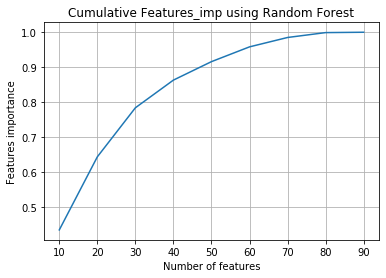

In [0]:
x_axis = [10,20,30,40,50,60,70,80,90]
y_axis = percent_importance_rf
plt.plot(x_axis, y_axis)
plt.grid()
plt.xlabel('Number of features')
plt.ylabel('Features importance')
plt.title("Cumulative Features_imp using Random Forest")
plt.show()

In [0]:
feature_importances_rf.to_excel('FI_rf.xlsx')

# Features_importance using XGBoostClassifier

In [0]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X, y)
xgb_clf.score(X,y)

1.0

In [0]:
importances_xbg = xgb_clf.feature_importances_

feature_importances_xgb = pd.DataFrame(xgb_clf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
                                  
feature_importances_xgb.head()

,importance
googlepagerankofcompanywebsite,0.074522
Technicalproficienciestoanalyseandinterpretunstructureddata,0.066430
TopmanagementsimilarityL,0.040512
Renownedinprofessionalcircle,0.037529
ExperienceinsellingandbuildingproductsL,0.035818


In [0]:
percent_importance_xgb = []
a=0
for i in [10,20,30,40,50,60,70,80,90]:
  percent_importance_xgb.append(feature_importances_xgb.importance.head(i).sum())
  print(f"For {i} features-> {percent_importance_xgb[int(a)]}")
  a=a+1

For 10 features-> 0.3983774185180664
For 20 features-> 0.6256094574928284
For 30 features-> 0.7706154584884644
For 40 features-> 0.867672860622406
For 50 features-> 0.9420369267463684
For 60 features-> 0.990154504776001
For 70 features-> 1.0
For 80 features-> 1.0
For 90 features-> 1.0


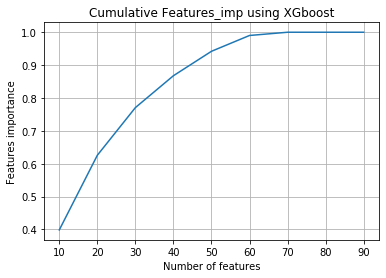

In [0]:
x_axis = [10,20,30,40,50,60,70,80,90]
y_axis = percent_importance_xgb
plt.plot(x_axis, y_axis)
plt.grid()
plt.xlabel('Number of features')
plt.ylabel('Features importance')
plt.title("Cumulative Features_imp using XGboost")

plt.show()

In [0]:
feature_importances_xgb.to_excel('FI_xgb.xlsx')

# Features_importance using GradientBoostingClassifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf2 = GradientBoostingClassifier()
gb_clf2.fit(X, y)
gb_clf2.score(X,y)

1.0

In [0]:
importances_gbclf = gb_clf2.feature_importances_

feature_importances_gbclf = pd.DataFrame(gb_clf2.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
                                  
feature_importances_gbclf.head()

,importance
googlepagerankofcompanywebsite,0.269748
Technicalproficienciestoanalyseandinterpretunstructureddata,0.081572
Survivalthroughrecessionbasedonexistenceofthecompanythroughreces,0.068825
DificultyofObtainingWorkforceL,0.068478
Renownedinprofessionalcircle,0.049073


In [0]:
percent_importance_gb = []
a=0
for i in [10,20,30,40,50,60,70,80,90]:
  percent_importance_gb.append(feature_importances_gbclf.importance.head(i).sum())
  print(f"For {i} features-> {percent_importance_gb[int(a)]}")
  a=a+1

For 10 features-> 0.7181318489582377
For 20 features-> 0.8733561961216804
For 30 features-> 0.940482018769374
For 40 features-> 0.9770465361020982
For 50 features-> 0.9936234016096664
For 60 features-> 0.9994452172576721
For 70 features-> 0.9999999999999999
For 80 features-> 0.9999999999999999
For 90 features-> 0.9999999999999999


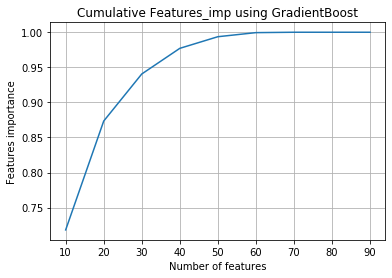

In [0]:
x_axis = [10,20,30,40,50,60,70,80,90]
y_axis = percent_importance_gb
plt.plot(x_axis, y_axis)
plt.grid()
plt.xlabel('Number of features')
plt.ylabel('Features importance')
plt.title("Cumulative Features_imp using GradientBoost")

plt.show()

In [0]:
feature_importances_gbclf.to_excel('FI_gb.xlsx')

# Feature_importance by taking mean of above three classifier

In [0]:
imp_features = pd.read_excel('Final_features_importance_mean.xlsx')
imp_features.shape

(90, 2)

In [0]:
imp_features.head()

,Features_name,Features_importance_mean
0,googlepagerankofcompanywebsite,0.143468
1,Technicalproficienciestoanalyseandinterpretuns...,0.064479
2,Internet_activity_Score,0.046067
3,Renownedinprofessionalcircle,0.041973
4,Survivalthroughrecessionbasedonexistenceofthec...,0.035294


In [0]:
percent_imp = []
a=0
for i in [10,20,30,40,50,60,70,80,90]:
  percent_imp.append(imp_features.Features_importance_mean.head(i).sum())
  print(f"For {i} features-> {percent_imp[int(a)]}")
  a=a+1



For 10 features-> 0.48559023301852533
For 20 features-> 0.6769257987562622
For 30 features-> 0.8032097120129373
For 40 features-> 0.8798612564956971
For 50 features-> 0.9374169986404379
For 60 features-> 0.9735699879643498
For 70 features-> 0.9908671316905961
For 80 features-> 0.9979351774419865
For 90 features-> 1.0000000067908936


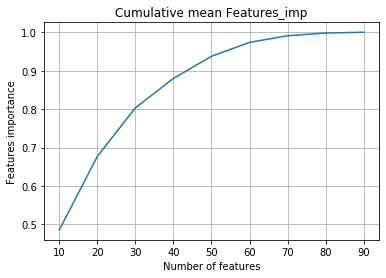

In [0]:
x_axis = [10,20,30,40,50,60,70,80,90]
y_axis = percent_imp
plt.plot(x_axis, y_axis)
plt.grid()
plt.xlabel('Number of features')
plt.ylabel('Features importance')
plt.title("Cumulative mean Features_imp")
plt.show()

# Selection of top 50 **features**

In [0]:
#selecting number of features
df50 = imp_features.head(50)
df = df50
df.shape

(50, 2)

In [0]:
df.Features_name.to_numpy()

array(['googlepagerankofcompanywebsite',
       'Technicalproficienciestoanalyseandinterpretunstructureddata',
       'Internet_activity_Score', 'Renownedinprofessionalcircle',
       'Survivalthroughrecessionbasedonexistenceofthecompanythroughreces',
       'TeamCompositionscoreL', 'DificultyofObtainingWorkforceL',
       'ExperienceinsellingandbuildingproductsL',
       'Employeesperyearofcompanyexistence', 'TopmanagementsimilarityL',
       'Focusonstructuredorunstructureddata',
       'NumberofSalesSupportmaterialL',
       'NumberofRecognitionsforFoundersandCofounders',
       'Age_of_company_in_years', 'Focusonprivateorpublicdata',
       'NumberofDirectcompetitors', 'Continent_of_company',
       'DisruptivenessoftechnologyL', 'Gartnerhypecyclestage',
       'DegreefromaTier1orTier2university',
       'Cateringtoproductserviceacrossverticals', 'BigDataBusiness',
       'Yearsofeducation', 'Localorglobalplayer', 'Employee_Count',
       'Avgtimetoinvestmentaverageacrossallroundsm

In [0]:
features = pd.DataFrame()
for col in X.columns:
   if(col in df.Features_name.to_numpy()):
       features[col]=X[col].iloc[:]

In [0]:
features.shape

(472, 50)

In [0]:
features.to_excel('top50_features.xlsx')

In [0]:
#OneHotEncoding Categorical columns
df1 = pd.read_excel("top50_features_OHC.xlsx")

In [0]:
df1.shape

(472, 57)

In [0]:
df_new = pd.get_dummies(df1.Focus_function,prefix='Focus_function')
df_new.head()

,Focus_function_1,Focus_function_2,Focus_function_3,Focus_function_4,Focus_function_5,Focus_function_6
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [0]:
df_new = pd.concat([df_new,pd.get_dummies(df1.Continent_of_company,prefix='Continent')],axis=1)
df_new.shape

(472, 10)

In [0]:
df_new.head()

,Focus_function_1,Focus_function_2,Focus_function_3,Focus_function_4,Focus_function_5,Focus_function_6,Continent_1,Continent_2,Continent_3,Continent_4
0,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,1,0,0,0


In [0]:
df2 = pd.concat([df1,df_new],axis=1)
df2.shape

(472, 67)

In [0]:
features_new = df2.drop(columns=['Focus_function','Continent_of_company'],axis=1)
features_new.shape

(472, 65)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features_new,y,test_size=0.20)

In [0]:
X_train.shape, X_test.shape

((377, 65), (95, 65))

In [0]:
y_train.shape, y_test.shape

((377,), (95,))

# ML Algorithms

## Naive **Bayes**


In [0]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model_Gaus = GaussianNB()
model_MultiN = MultinomialNB()

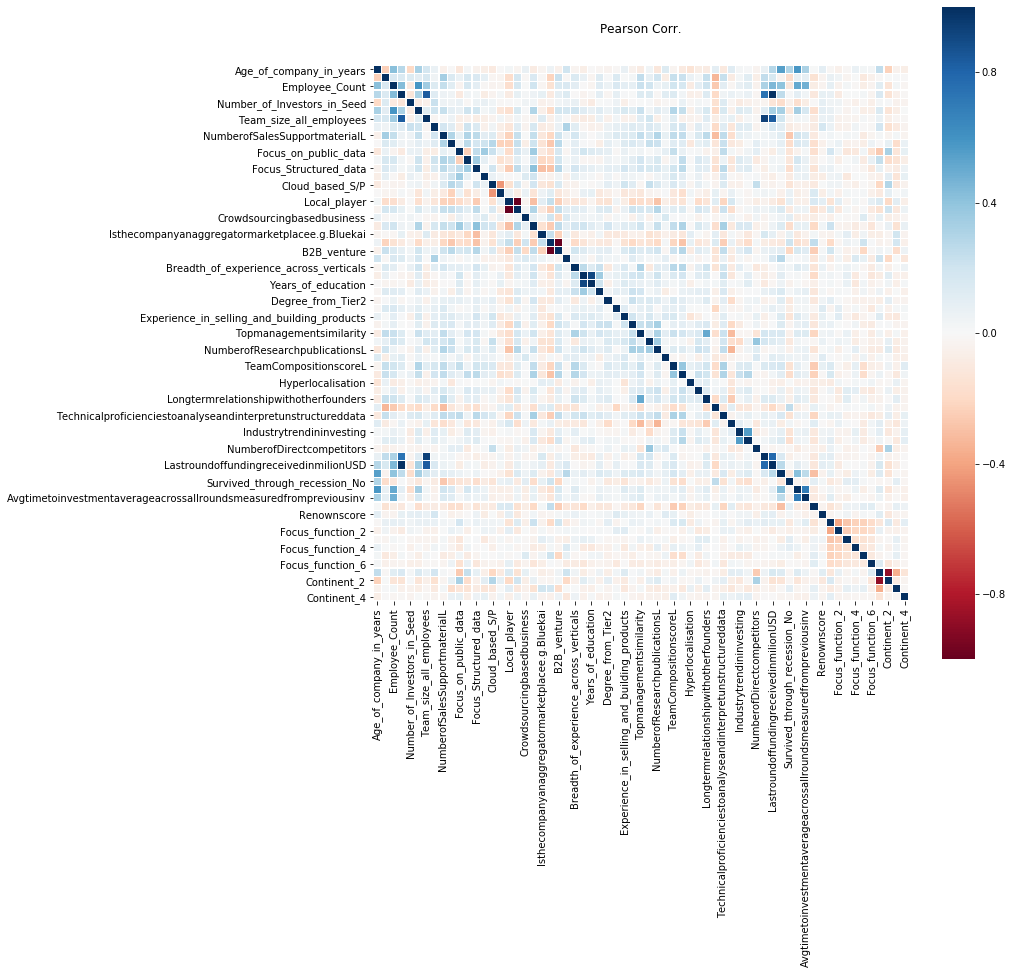

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Pearson Corr.', y=1.05, size=12)
sns.heatmap(features_new.astype(float).corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

In [0]:
model_Gaus.fit(X_train,y_train)
model_Gaus.score(X_test,y_test)

0.7052631578947368

In [0]:
model_Gaus.fit(features_new,y)
model_Gaus.score(features_new,y)

0.7838983050847458

In [0]:
model_MultiN.fit(X_train,y_train)
model_MultiN.score(X_test,y_test)

ValueError: ignored

## Naive Bayes - **GridSearch**






In [0]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),features_new,y,cv=5)

array([0.70526316, 0.76842105, 0.72340426, 0.71276596, 0.55319149])

In [0]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(GaussianNB(),{},cv=5, return_train_score=False,)
clf.fit(features_new,y)
clf.cv_results_
results = pd.DataFrame(clf.cv_results_)
results[['mean_test_score']]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,mean_test_score
0,0.692797


In [0]:
y_pred = clf.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        36
           1       0.82      0.83      0.82        59

    accuracy                           0.78        95
   macro avg       0.77      0.76      0.76        95
weighted avg       0.78      0.78      0.78        95



In [0]:
print(confusion_matrix(y_test,y_pred))

[[25 11]
 [10 49]]


## **Logistic Regression- GridSearch**








In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
clf_lr = GridSearchCV(LogisticRegression(),{'C':[1,5,10],'class_weight':[None,'balanced'],
                                         'solver':['newton-cg','lbfgs','liblinear','saga'] 

}, cv=5, return_train_score=False)
clf_lr.fit(features_new,y)
clf_lr.cv_results_
results2 = pd.DataFrame(clf_lr.cv_results_)
results2[['param_C','param_class_weight','param_solver','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_C,param_class_weight,param_solver,mean_test_score
8,5,None,newton-cg,0.851695
16,10,None,newton-cg,0.851695
0,1,None,newton-cg,0.847458
12,5,balanced,newton-cg,0.826271
4,1,balanced,newton-cg,0.822034
20,10,balanced,newton-cg,0.817797
22,10,balanced,liblinear,0.766949
14,5,balanced,liblinear,0.766949
6,1,balanced,liblinear,0.766949
10,5,None,liblinear,0.688559


In [0]:
y_pred = clf_lr.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        36
           1       0.87      0.92      0.89        59

    accuracy                           0.86        95
   macro avg       0.86      0.85      0.85        95
weighted avg       0.86      0.86      0.86        95

[[28  8]
 [ 5 54]]


## **Decision Tree-GridSearch**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
from sklearn.model_selection import GridSearchCV
clf_dt = GridSearchCV(DecisionTreeClassifier(),
                   {'criterion': ['gini','entropy'],'class_weight':[None,'balanced']
                      }, cv=5, return_train_score=False)
clf_dt.fit(features_new,y)
clf_dt.cv_results_
results2 = pd.DataFrame(clf_dt.cv_results_)
results2[['param_criterion','param_class_weight','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_criterion,param_class_weight,mean_test_score
2,gini,balanced,0.807203
0,gini,None,0.805085
1,entropy,None,0.790254
3,entropy,balanced,0.775424


In [0]:
y_pred = clf_dt.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        59

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95

[[36  0]
 [ 0 59]]


## RandomForest-GridSearch

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf_rf = GridSearchCV(RandomForestClassifier(),{'criterion': ['gini','entropy'],'class_weight':[None,'balanced'],'n_estimators':[50,100,200]
                      }, cv=5, return_train_score=False)
clf_rf.fit(features_new,y)
clf_rf.cv_results_
results2 = pd.DataFrame(clf_rf.cv_results_)
results2[['param_criterion','param_class_weight','param_n_estimators','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_criterion,param_class_weight,param_n_estimators,mean_test_score
4,entropy,None,100,0.868644
5,entropy,None,200,0.864407
10,entropy,balanced,100,0.864407
7,gini,balanced,100,0.862288
8,gini,balanced,200,0.860169
11,entropy,balanced,200,0.860169
1,gini,None,100,0.858051
2,gini,None,200,0.858051
0,gini,None,50,0.855932
3,entropy,None,50,0.855932


In [0]:
y_pred = clf_rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        59

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95

[[36  0]
 [ 0 59]]


## SVM


In [0]:
from sklearn import svm

In [0]:
'''
from sklearn.model_selection import GridSearchCV
clf_svc = GridSearchCV(svm.SVC(gamma='auto'),{'C': [0.1,1],'kernel': ['rbf','linear']
                      }, cv=2, return_train_score=False)
clf_svc.fit(features,y)
clf_svc.cv_results_
results2 = pd.DataFrame(clf_svc.cv_results_)
results2[['param_C','param_kernel','mean_test_score']].sort_values('mean_test_score',ascending=False)
'''


In [0]:
from sklearn.svm import SVC
model_svc = SVC()

In [0]:
model_svc.fit(X_train, y_train)

In [0]:
model_svc.score(X_test,y_test)

0.6210526315789474

In [0]:
y_pred = model_svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.62      1.00      0.77        59

    accuracy                           0.62        95
   macro avg       0.31      0.50      0.38        95
weighted avg       0.39      0.62      0.48        95

[[ 0 36]
 [ 0 59]]


In [0]:
model_svc1 = SVC(C=0.1,class_weight='balanced',kernel='rbf',degree=5)
model_svc1.fit(X_train, y_train)
model_svc1.score(X_test,y_test)

In [0]:
y_pred = model_svc1.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

## K Nearest Neighbors Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier


In [0]:
neigh = GridSearchCV(KNeighborsClassifier(algorithm='auto'),{'n_neighbors': [5,10,15,20,25]
                      }, cv=5, return_train_score=False)
neigh.fit(features_new,y)
neigh.cv_results_
results2 = pd.DataFrame(neigh.cv_results_)
results2[['param_n_neighbors','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_n_neighbors,mean_test_score
2,15,0.773305
3,20,0.769068
4,25,0.760593
1,10,0.752119
0,5,0.739407


In [0]:
y_pred = neigh.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.58      0.68        36
           1       0.78      0.92      0.84        59

    accuracy                           0.79        95
   macro avg       0.80      0.75      0.76        95
weighted avg       0.79      0.79      0.78        95

[[21 15]
 [ 5 54]]


## Boosting Classifier-**GridSearch** 


In [0]:
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [0]:
# Create boosting classifiers
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

boost_array = [ada_boost, grad_boost, xgb_boost]

eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')

labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']

for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, features_new, y, cv=5, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.854, std: (+/-) 0.056 [Ada Boost]
Mean: 0.854, std: (+/-) 0.054 [Grad Boost]
Mean: 0.856, std: (+/-) 0.054 [XG Boost]
Mean: 0.856, std: (+/-) 0.052 [Ensemble]


In [0]:
xgb_boost.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_boost.score(X_test,y_test)

0.9157894736842105

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
xgb_boost = GridSearchCV(XGBClassifier(),{'eta': [0.3,0.4,0.5], 'max_depth':[30,50,80],'n_estimators':[100,200,400,600]
                      }, cv=5, return_train_score=False)
xgb_boost.fit(features_new,y)
xgb_boost.cv_results_
results2 = pd.DataFrame(xgb_boost.cv_results_)
results2[['param_eta','param_max_depth','param_n_estimators','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_eta,param_max_depth,param_n_estimators,mean_test_score
0,0.3,30,100,0.838983
8,0.3,80,100,0.838983
16,0.4,50,100,0.838983
24,0.5,30,100,0.838983
12,0.4,30,100,0.838983
20,0.4,80,100,0.838983
28,0.5,50,100,0.838983
32,0.5,80,100,0.838983
4,0.3,50,100,0.838983
30,0.5,50,400,0.836864
